In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(0)


In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

(1000,) (1000, 1)


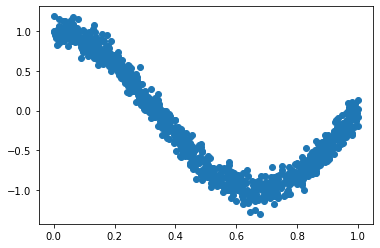

In [3]:
n_samples = 1_000

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y,)
print(X.shape, X.reshape(-1, 1).shape)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 1), (800, 1), (200, 1), (200, 1))

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

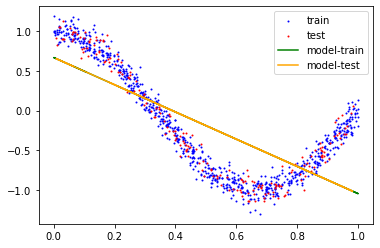

In [7]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

plt.scatter(X_train, y_train, label='train', color='blue', s=1)
plt.scatter(X_test, y_test, label='test', color='red', s=1)
plt.plot(X_train, y_pred_train, label='model-train', color='green')
plt.plot(X_test, y_pred_test, label='model-test', color='orange')
plt.legend()


In [8]:
mse = np.mean((y_pred_train - y_train)**2)
mse

0.1981069491878308

$$modelo = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$$
$$modelo = \beta_0 + cos(\beta_1) X_1 + \beta_2^4 X_2 + ... + \ln(\beta_n) X_n$$


$$regre-lineal-polinomica = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + ... + \beta_n X_1^n$$


In [9]:
degree = 4

polynomial_features = PolynomialFeatures(
    degree=degree, include_bias=False
)

X_poly = polynomial_features.fit_transform(X.reshape(-1, 1))

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y,
    test_size=0.2
)

X_poly_train.shape, X_poly_test.shape, y_poly_train.shape, y_poly_test.shape

((800, 4), (200, 4), (800,), (200,))

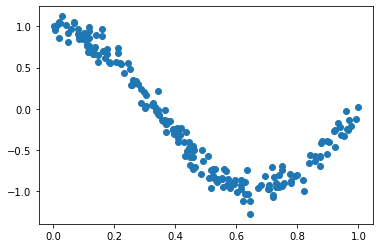

In [10]:
plt.scatter(X_poly_test[:, 0], y_poly_test)

In [11]:
modelo_polinomial = LinearRegression()
modelo_polinomial.fit(X_poly_train, y_poly_train)
y_pred_poly_test = modelo_polinomial.predict(X_poly_test)

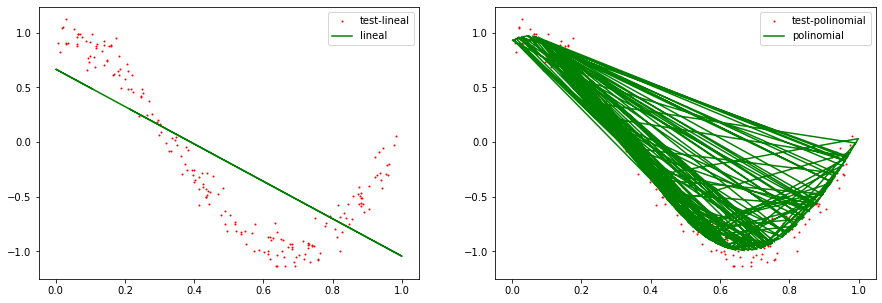

In [12]:


fig, axs = plt.subplots(
    1, 2,
    figsize=(15, 5),
)
axs[0].scatter(X_test, y_test, label='test-lineal', color='red', s=1)
axs[0].plot(X_train, y_pred_train, label='lineal', color='green')

axs[1].scatter(X_test, y_test, label='test-polinomial', color='red', s=1)
axs[1].plot(X_poly_test[:, 0], y_pred_poly_test, label='polinomial', color='green')

_ = [ax.legend() for ax in axs]
